
# Classification with PCA and Confusion Matrix Analysis

**Dataset**: MNIST (vectorized 28x28 images → 784 features)  
**Samples used**: 2000  
**Train/Test split**: 80:20  

**Classifiers**
1. Logistic Regression  
2. SVM (RBF)  
3. KNN  
4. Decision Tree  

**Dimensionality Reduction**
- PCA with varying number of components
- Performance comparison
- Confusion matrix heatmaps

Library used: **scikit-learn**
General approch: used pipleline approch to execute the specified models with **scikit-learn**


In [4]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [11]:

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Use only 2000 samples
X_subset, _, y_subset, _ = train_test_split(
    X, y, train_size=2000, stratify=y, random_state=42
)

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, stratify=y_subset, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1600, 784)
Test shape: (400, 784)


In [ ]:

# PCA component settings
pca_components = [10, 20, 40, 80, 160]

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {name: [] for name in models}


In [ ]:

for n_comp in pca_components:
    print(f"\nPCA Components: {n_comp}")
    for name, model in models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_comp, random_state=42)),
            ('clf', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)
        print(f"{name}: Accuracy = {acc:.4f}")



PCA Components: 10


c:\Users\Rahul\anaconda3\envs\ml_env\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Logistic Regression: Accuracy = 0.7575
SVM: Accuracy = 0.8550
KNN: Accuracy = 0.8250
Decision Tree: Accuracy = 0.7075

PCA Components: 20
Logistic Regression: Accuracy = 0.8350
SVM: Accuracy = 0.9025
KNN: Accuracy = 0.8675
Decision Tree: Accuracy = 0.7000

PCA Components: 40
Logistic Regression: Accuracy = 0.8400
SVM: Accuracy = 0.9150
KNN: Accuracy = 0.8975
Decision Tree: Accuracy = 0.6950

PCA Components: 80
Logistic Regression: Accuracy = 0.8525
SVM: Accuracy = 0.9100
KNN: Accuracy = 0.8850
Decision Tree: Accuracy = 0.6550

PCA Components: 160
Logistic Regression: Accuracy = 0.8400
SVM: Accuracy = 0.9075
KNN: Accuracy = 0.8575
Decision Tree: Accuracy = 0.6500


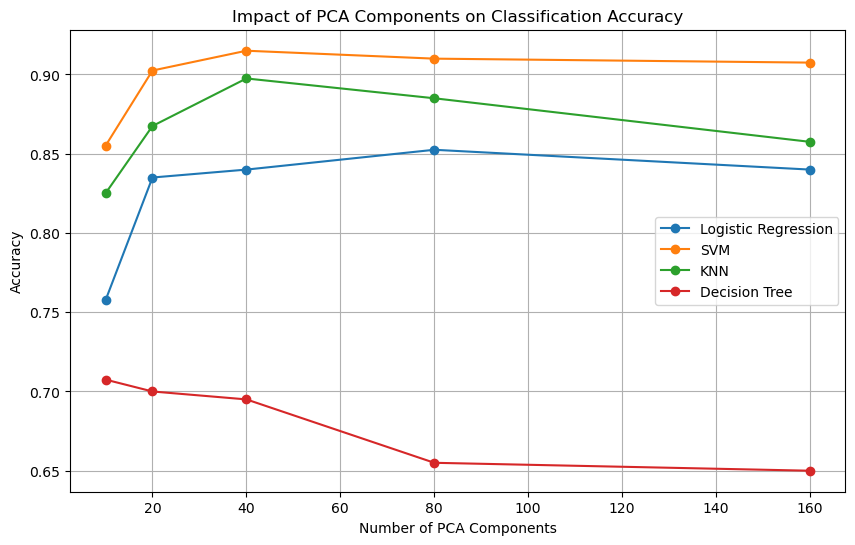

In [14]:

# Plot Accuracy vs PCA Components
plt.figure(figsize=(10,6))
for name, accs in results.items():
    plt.plot(pca_components, accs, marker='o', label=name)

plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Impact of PCA Components on Classification Accuracy")
plt.legend()
plt.grid(True)
plt.show()


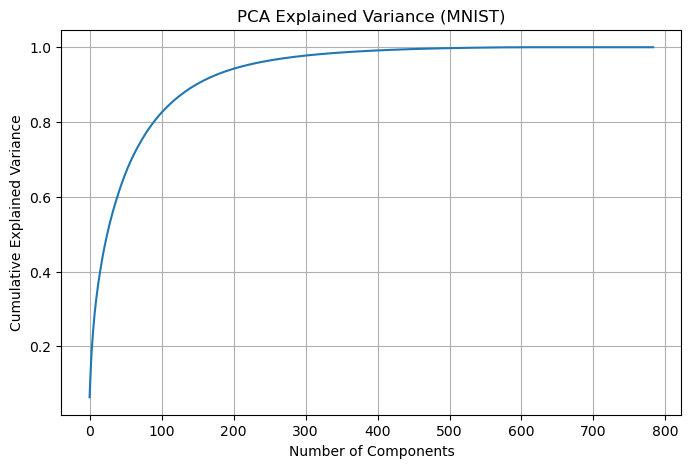

In [15]:

# Explained variance analysis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca_full = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance (MNIST)")
plt.grid(True)
plt.show()


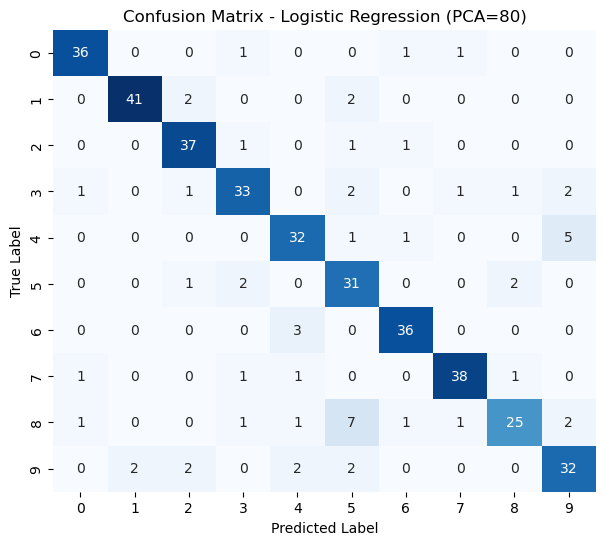

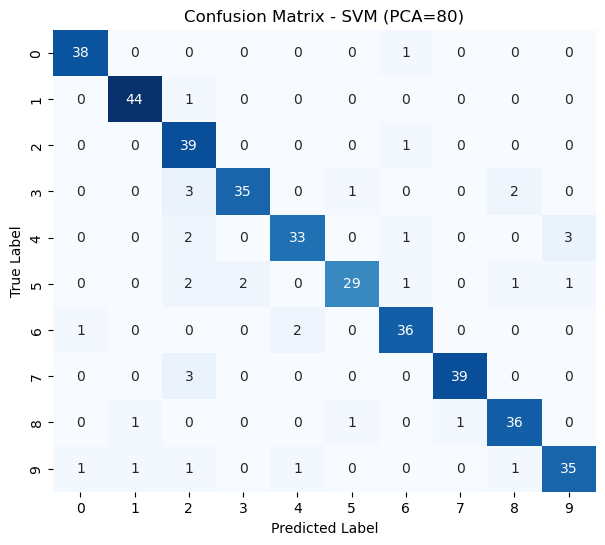

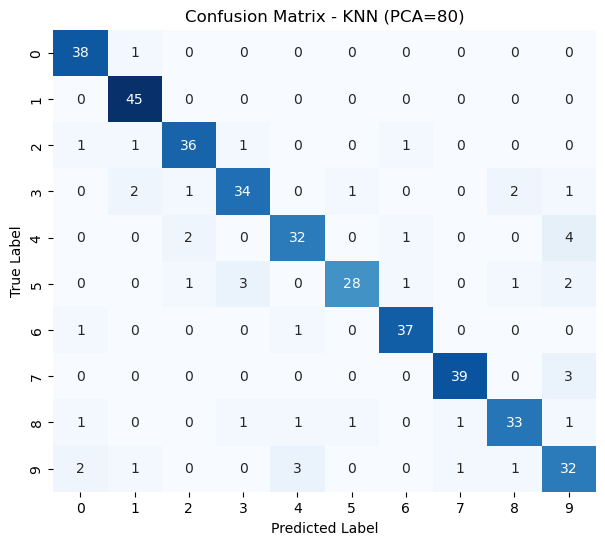

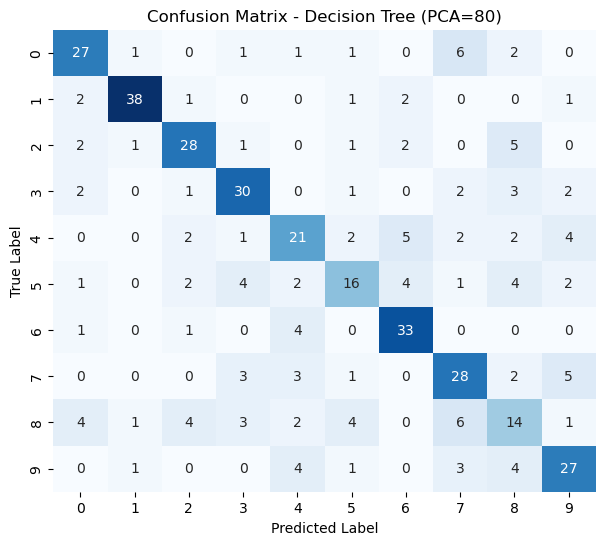

In [16]:

# Confusion Matrix Heatmaps using PCA = 80 components
best_pca = 80

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=best_pca, random_state=42)),
        ('clf', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name} (PCA={best_pca})")
    plt.show()



## Interpretation Notes

- PCA reduces noise and correlation in pixel space.
- Logistic Regression and SVM benefit most from PCA.
- KNN performance improves after PCA due to reduced dimensionality.
- Decision Trees are less sensitive to scaling but may lose information after PCA.
- Confusion matrices highlight systematic digit confusions beyond accuracy metrics.
